In [2]:
names = open('names.txt').read().split()

In [3]:
names[:10]

['emma',
 'olivia',
 'ava',
 'isabella',
 'sophia',
 'charlotte',
 'mia',
 'amelia',
 'harper',
 'evelyn']

In [4]:
len(names)

32033

In [5]:
min(len(w) for w in names)

2

In [6]:
max(len(w) for w in names)

15

In [7]:
b = {}
for w in names:
    alist = ['<S>'] + list(w) + ['<E>']
    for c1,c2 in zip(alist[:-1],alist[1:]):
        b[(c1,c2)] = b.get((c1,c2),0) + 1

In [8]:
sorted(b.items(),key=lambda x:-x[-1])

[(('n', '<E>'), 6763),
 (('a', '<E>'), 6640),
 (('a', 'n'), 5438),
 (('<S>', 'a'), 4410),
 (('e', '<E>'), 3983),
 (('a', 'r'), 3264),
 (('e', 'l'), 3248),
 (('r', 'i'), 3033),
 (('n', 'a'), 2977),
 (('<S>', 'k'), 2963),
 (('l', 'e'), 2921),
 (('e', 'n'), 2675),
 (('l', 'a'), 2623),
 (('m', 'a'), 2590),
 (('<S>', 'm'), 2538),
 (('a', 'l'), 2528),
 (('i', '<E>'), 2489),
 (('l', 'i'), 2480),
 (('i', 'a'), 2445),
 (('<S>', 'j'), 2422),
 (('o', 'n'), 2411),
 (('h', '<E>'), 2409),
 (('r', 'a'), 2356),
 (('a', 'h'), 2332),
 (('h', 'a'), 2244),
 (('y', 'a'), 2143),
 (('i', 'n'), 2126),
 (('<S>', 's'), 2055),
 (('a', 'y'), 2050),
 (('y', '<E>'), 2007),
 (('e', 'r'), 1958),
 (('n', 'n'), 1906),
 (('y', 'n'), 1826),
 (('k', 'a'), 1731),
 (('n', 'i'), 1725),
 (('r', 'e'), 1697),
 (('<S>', 'd'), 1690),
 (('i', 'e'), 1653),
 (('a', 'i'), 1650),
 (('<S>', 'r'), 1639),
 (('a', 'm'), 1634),
 (('l', 'y'), 1588),
 (('<S>', 'l'), 1572),
 (('<S>', 'c'), 1542),
 (('<S>', 'e'), 1531),
 (('j', 'a'), 1473),
 (

In [9]:
import torch

In [10]:
N = torch.zeros((27,27),dtype=torch.int32)

In [11]:
chars = sorted(list(set(''.join(names))))

In [20]:
stoi = {}
stoi['.'] = 0
itos = {}
itos[0] = '.'
for i,c in enumerate(chars):
    stoi[c] = i+1
    itos[i+1] = c 

In [21]:
for w in names:
    chs = ['.'] + list(w) + ['.']
    for c1,c2 in zip(chs,chs[1:]):
        i1 = stoi[c1]
        i2 = stoi[c2]
        N[i1][i2] += 1

In [180]:
XX=N/N.sum(dim=1,keepdims=True)

In [23]:
stoi

{'.': 0,
 'a': 1,
 'b': 2,
 'c': 3,
 'd': 4,
 'e': 5,
 'f': 6,
 'g': 7,
 'h': 8,
 'i': 9,
 'j': 10,
 'k': 11,
 'l': 12,
 'm': 13,
 'n': 14,
 'o': 15,
 'p': 16,
 'q': 17,
 'r': 18,
 's': 19,
 't': 20,
 'u': 21,
 'v': 22,
 'w': 23,
 'x': 24,
 'y': 25,
 'z': 26}

(-0.5, 26.5, 26.5, -0.5)

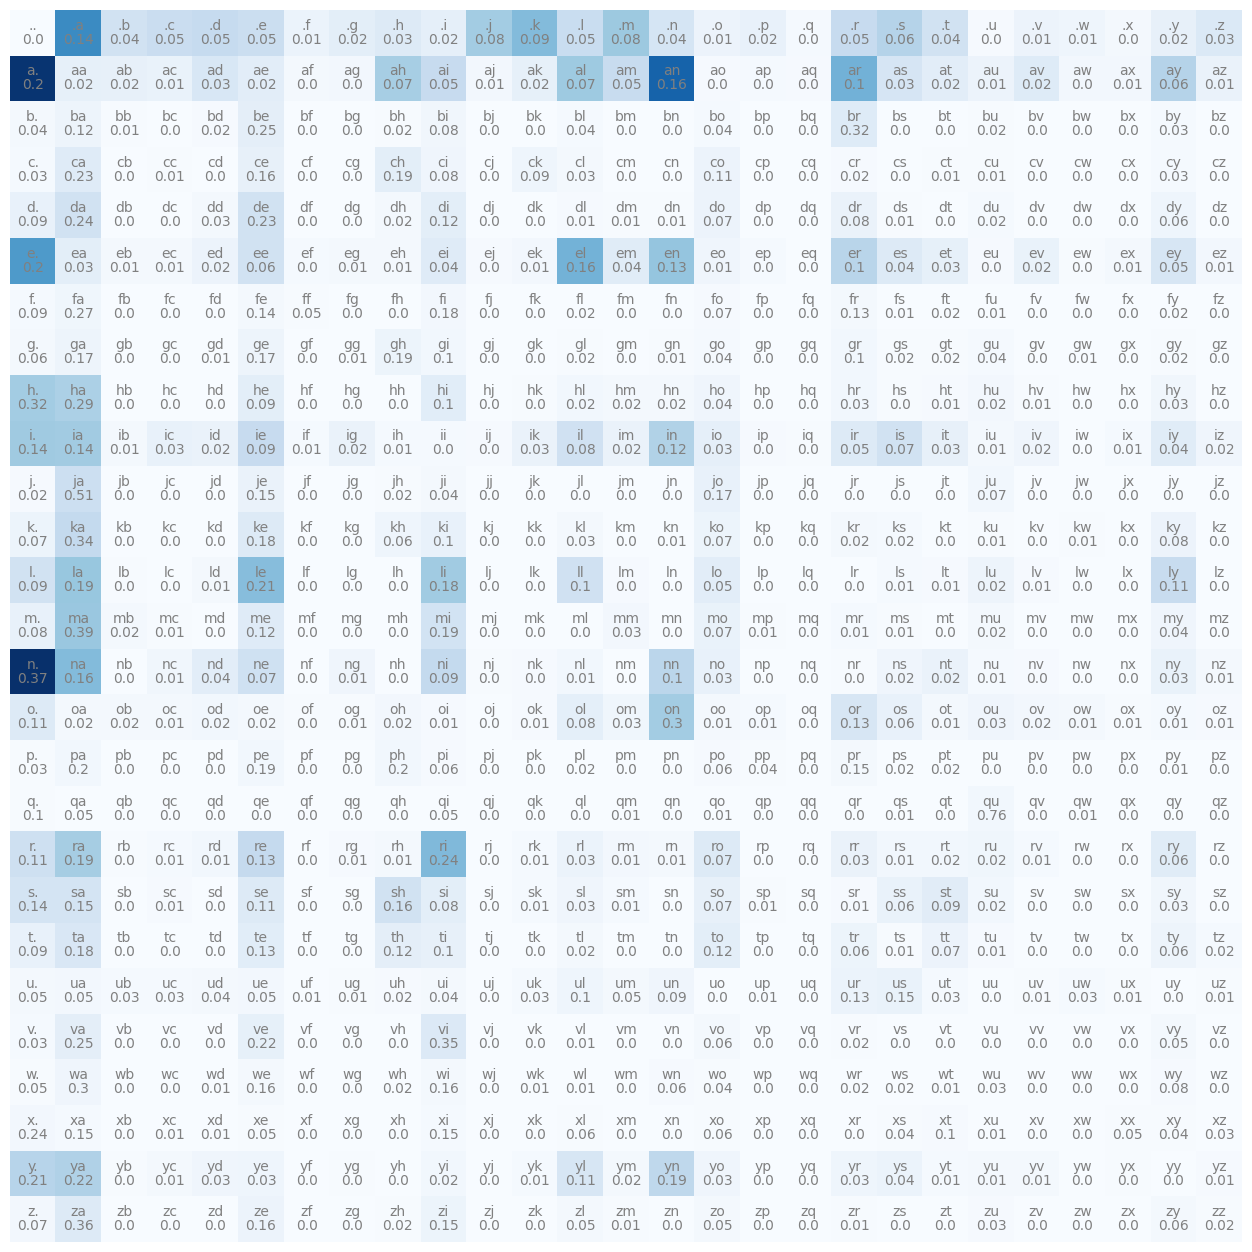

In [182]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,16))
plt.imshow(N,cmap='Blues')
for i in range(27):
    for j in range(27):
        s = itos[i]+itos[j]
        plt.text(j,i,s,ha='center',va='bottom',color='gray')
        plt.text(j,i,round(XX[i][j].item(),2),ha='center',va='top',color='gray')
plt.axis('off')

In [31]:
p = N[0].float()
p = p / p.sum()
p

tensor([0.0000, 0.1377, 0.0408, 0.0481, 0.0528, 0.0478, 0.0130, 0.0209, 0.0273,
        0.0184, 0.0756, 0.0925, 0.0491, 0.0792, 0.0358, 0.0123, 0.0161, 0.0029,
        0.0512, 0.0642, 0.0408, 0.0024, 0.0117, 0.0096, 0.0042, 0.0167, 0.0290])

In [32]:
g = torch.Generator().manual_seed(1334)

In [55]:
ix = torch.multinomial(p,num_samples=1,replacement=True,generator=g)
ix

tensor([1])

In [99]:
P = (N+1).float()
probs = P / P.sum(dim=1,keepdim=True)

In [100]:
for _ in range(5):
    idx = 0
    ans = []
    while True:
        idx = torch.multinomial(probs[idx],num_samples=1,replacement=True,generator=g).item()
        ans.append(itos[idx])
        if idx == 0:
            break
    print(''.join(ans))
    

lemmaynaiha.
jexma.
tinallavaxsi.
ryrath.
dorer.


In [68]:
log_likehood = 0.0
n = 0
for w in names:
    alist = ['.'] + list(w) + ['.']
    for c1,c2 in zip(alist,alist[1:]):
        i1 = stoi[c1]
        i2 = stoi[c2]
        p = probs[i1][i2]
        log_likehood += torch.log(p)
        n += 1

In [69]:
print(log_likehood)

tensor(-559938.8125)


In [70]:
print(-log_likehood/n)

tensor(2.4543)


In [71]:
xs,ys = [],[]

for w in names[:1]:
    alist = ['.'] + list(w) + ['.']
    for c1,c2 in zip(alist,alist[1:]):
        print('{} --> {}'.format(c1,c2))
        i1 = stoi[c1]
        i2 = stoi[c2]
        xs.append(i1)
        ys.append(i2)

. --> e
e --> m
m --> m
m --> a
a --> .


In [72]:
print(xs)

[0, 5, 13, 13, 1]


In [73]:
print(ys)

[5, 13, 13, 1, 0]


In [75]:
xs = torch.tensor(xs)

In [81]:
import torch.nn.functional as F
xenc=F.one_hot(xs,num_classes=27).float()

In [82]:
xenc

tensor([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [83]:
xenc.shape

torch.Size([5, 27])

In [84]:
xenc.dtype

torch.float32

In [87]:
W = torch.randn((27,27))

In [88]:
xenc @ W

tensor([[ 0.6716,  0.2937,  0.5696,  0.3788, -0.1547,  1.6524, -0.4401,  0.0368,
         -0.9563, -0.6531, -0.5907,  1.2977,  0.7014, -0.6878, -0.9202,  0.0400,
          1.5186, -0.0511, -0.2827,  1.5164, -1.9732, -0.4886,  0.8597, -0.5644,
         -0.1908,  0.5925,  0.8872],
        [-0.1478,  0.4186,  0.5660, -0.9719,  1.5220,  1.5395, -1.5079, -1.5562,
         -0.4473,  0.8602,  0.1096, -0.2480, -0.1875,  0.8615, -0.3509, -0.2968,
         -1.2014, -0.6395, -0.3717, -0.1658,  0.7190, -0.1113, -1.8009,  0.7947,
          0.1220, -0.1498, -1.0046],
        [-1.0124, -0.3655,  0.3492, -1.2886, -0.1723,  0.4606, -1.2534, -0.7325,
          0.4347, -0.6238,  1.2719, -1.3590,  0.0733, -2.4216,  0.6361, -0.3803,
         -0.4269,  1.0878, -0.4137, -2.2907,  1.8489,  0.7145,  1.0301,  1.1170,
         -1.4686,  0.8449,  0.8385],
        [-1.0124, -0.3655,  0.3492, -1.2886, -0.1723,  0.4606, -1.2534, -0.7325,
          0.4347, -0.6238,  1.2719, -1.3590,  0.0733, -2.4216,  0.6361, -0.3803

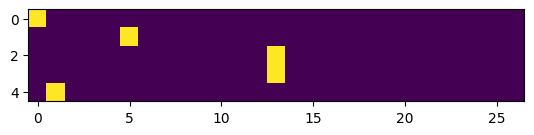

In [89]:
plt.imshow(xenc)

In [90]:
logits = xenc @ W

In [92]:
counts = logits.exp()

In [101]:
pp = counts / counts.sum(dim=1,keepdims=True)

In [102]:
pp

tensor([[0.0456, 0.0312, 0.0412, 0.0340, 0.0200, 0.1216, 0.0150, 0.0242, 0.0090,
         0.0121, 0.0129, 0.0853, 0.0470, 0.0117, 0.0093, 0.0242, 0.1063, 0.0221,
         0.0176, 0.1061, 0.0032, 0.0143, 0.0550, 0.0132, 0.0192, 0.0421, 0.0566],
        [0.0255, 0.0450, 0.0521, 0.0112, 0.1356, 0.1380, 0.0066, 0.0062, 0.0189,
         0.0700, 0.0330, 0.0231, 0.0245, 0.0700, 0.0208, 0.0220, 0.0089, 0.0156,
         0.0204, 0.0251, 0.0607, 0.0265, 0.0049, 0.0655, 0.0334, 0.0255, 0.0108],
        [0.0093, 0.0177, 0.0363, 0.0071, 0.0215, 0.0405, 0.0073, 0.0123, 0.0395,
         0.0137, 0.0913, 0.0066, 0.0275, 0.0023, 0.0483, 0.0175, 0.0167, 0.0759,
         0.0169, 0.0026, 0.1625, 0.0523, 0.0717, 0.0782, 0.0059, 0.0595, 0.0592],
        [0.0093, 0.0177, 0.0363, 0.0071, 0.0215, 0.0405, 0.0073, 0.0123, 0.0395,
         0.0137, 0.0913, 0.0066, 0.0275, 0.0023, 0.0483, 0.0175, 0.0167, 0.0759,
         0.0169, 0.0026, 0.1625, 0.0523, 0.0717, 0.0782, 0.0059, 0.0595, 0.0592],
        [0.0225, 0.0060,

In [107]:
xs = torch.tensor(xs)
ys = torch.tensor(ys)

/var/folders/z2/kds62tbj3x93zghv2_jz1xsr0000gn/T/ipykernel_74396/4154078383.py:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  xs = torch.tensor(xs)


In [108]:
nlls = torch.zeros(5)
for i in range(5):
    xi = xs[i].item()
    yi = ys[i].item()
    print(itos[xi],'---->',itos[yi])
    print('prob',probs[xi][yi])
    print('log prob',torch.log(probs[xi][yi]))
    print('neigative log prob',-torch.log(probs[xi][yi]))
    nlls[i] = -torch.log(probs[xi][yi])
print('mean',nlls.mean())

. ----> e
prob tensor(0.0478)
log prob tensor(-3.0409)
neigative log prob tensor(3.0409)
e ----> m
prob tensor(0.0377)
log prob tensor(-3.2793)
neigative log prob tensor(3.2793)
m ----> m
prob tensor(0.0253)
log prob tensor(-3.6763)
neigative log prob tensor(3.6763)
m ----> a
prob tensor(0.3892)
log prob tensor(-0.9436)
neigative log prob tensor(0.9436)
a ----> .
prob tensor(0.1959)
log prob tensor(-1.6302)
neigative log prob tensor(1.6302)
mean tensor(2.5141)


In [109]:
W = torch.randn((27,27),generator=g,requires_grad=True)

In [111]:
xenc = F.one_hot(xs,num_classes=27).float()

In [114]:
logits = xenc @ W

In [115]:
counts = logits.exp()
pp = counts / counts.sum(dim=1,keepdims=True)

In [125]:
loss = -pp[torch.arange(5),ys].log().mean()

In [126]:
loss

tensor(3.1433, grad_fn=<NegBackward0>)

In [127]:
W.grad = None

In [128]:
loss.backward()

In [155]:
xs = []
ys = [] 

for w in names:
    alist = ['.'] + list(w) + ['.']
    for c1,c2 in zip(alist,alist[1:]):
        i1 = stoi[c1]
        i2 = stoi[c2]
        xs.append(i1)
        ys.append(i2)
xs = torch.tensor(xs)
ys = torch.tensor(ys)

W = torch.randn((27,27),requires_grad=True)

for _ in range(50):
    xenc = F.one_hot(xs,num_classes=27).float()
    logits = xenc @ W 
    counts = logits.exp()
    pro = counts / counts.sum(dim=1,keepdims=True)
    loss = -pro[torch.arange(len(ys)),ys].log().mean() + 0.01*(W**2).mean()
    W.grad = None
    loss.backward()
    W.data -= W.grad*50
    print(loss.item())
    
    

    

3.7882800102233887
3.4102659225463867
3.1695427894592285
3.018953561782837
2.9235544204711914
2.856692314147949
2.806715965270996
2.7677793502807617
2.736617088317871
2.711118698120117
2.689809799194336
2.6716604232788086
2.6559650897979736
2.642240285873413
2.630139112472534
2.619400978088379
2.609821081161499
2.60123610496521
2.593510389328003
2.586533784866333
2.5802135467529297
2.5744717121124268
2.569241523742676
2.564466953277588
2.5600976943969727
2.556090831756592
2.5524075031280518
2.549014091491699
2.5458807945251465
2.542980909347534
2.540290594100952
2.5377893447875977
2.5354583263397217
2.5332815647125244
2.5312440395355225
2.5293335914611816
2.5275380611419678
2.5258476734161377
2.524254083633423
2.5227484703063965
2.521324634552002
2.519975423812866
2.518695831298828
2.5174801349639893
2.516324281692505
2.515223741531372
2.5141756534576416
2.5131754875183105
2.5122201442718506
2.511307716369629


In [163]:

for _ in range(5):
    xi = 0
    word = []
    while True:
        xenc = F.one_hot(torch.tensor([xi]),num_classes=27).float()
        logits = xenc @ W
        counts = logits.exp()
        pro = counts / counts.sum(dim=1,keepdims=True)
        xi = torch.multinomial(pro,num_samples=1,replacement=True).item()
        word.append(itos[xi])
        if xi == 0:
            break
    print(''.join(word))

asan.
s.
emian.
caja.
meya.


In [166]:
M = torch.zeros((27,27)).float()

In [168]:
for i in range(27):
    xenc = F.one_hot(torch.tensor([i]),num_classes=27).float()
    logits = xenc @ W
    counts = logits.exp()
    pro = counts / counts.sum(dim=1,keepdims=True)  
    M[i] = pro

(-0.5, 26.5, 26.5, -0.5)

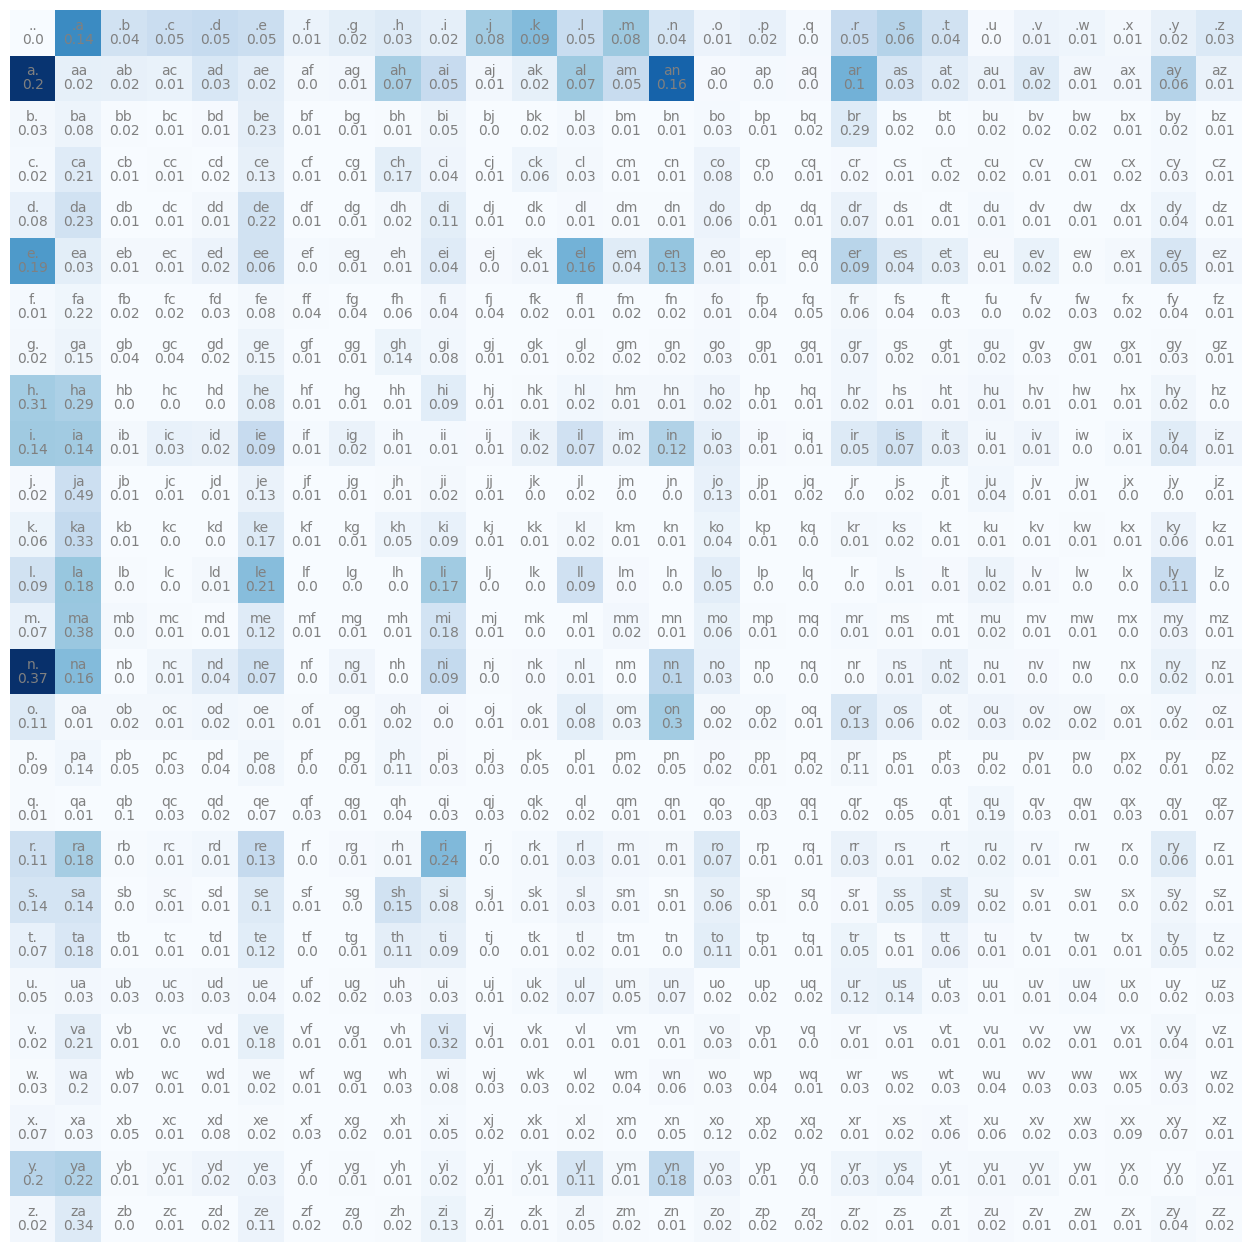

In [172]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,16))
plt.imshow(N,cmap='Blues')
for i in range(27):
    for j in range(27):
        s = itos[i]+itos[j]
        plt.text(j,i,s,ha='center',va='bottom',color='gray')
        plt.text(j,i,round(M[i][j].item(),2),ha='center',va='top',color='gray')
plt.axis('off')

(-0.5, 26.5, 26.5, -0.5)

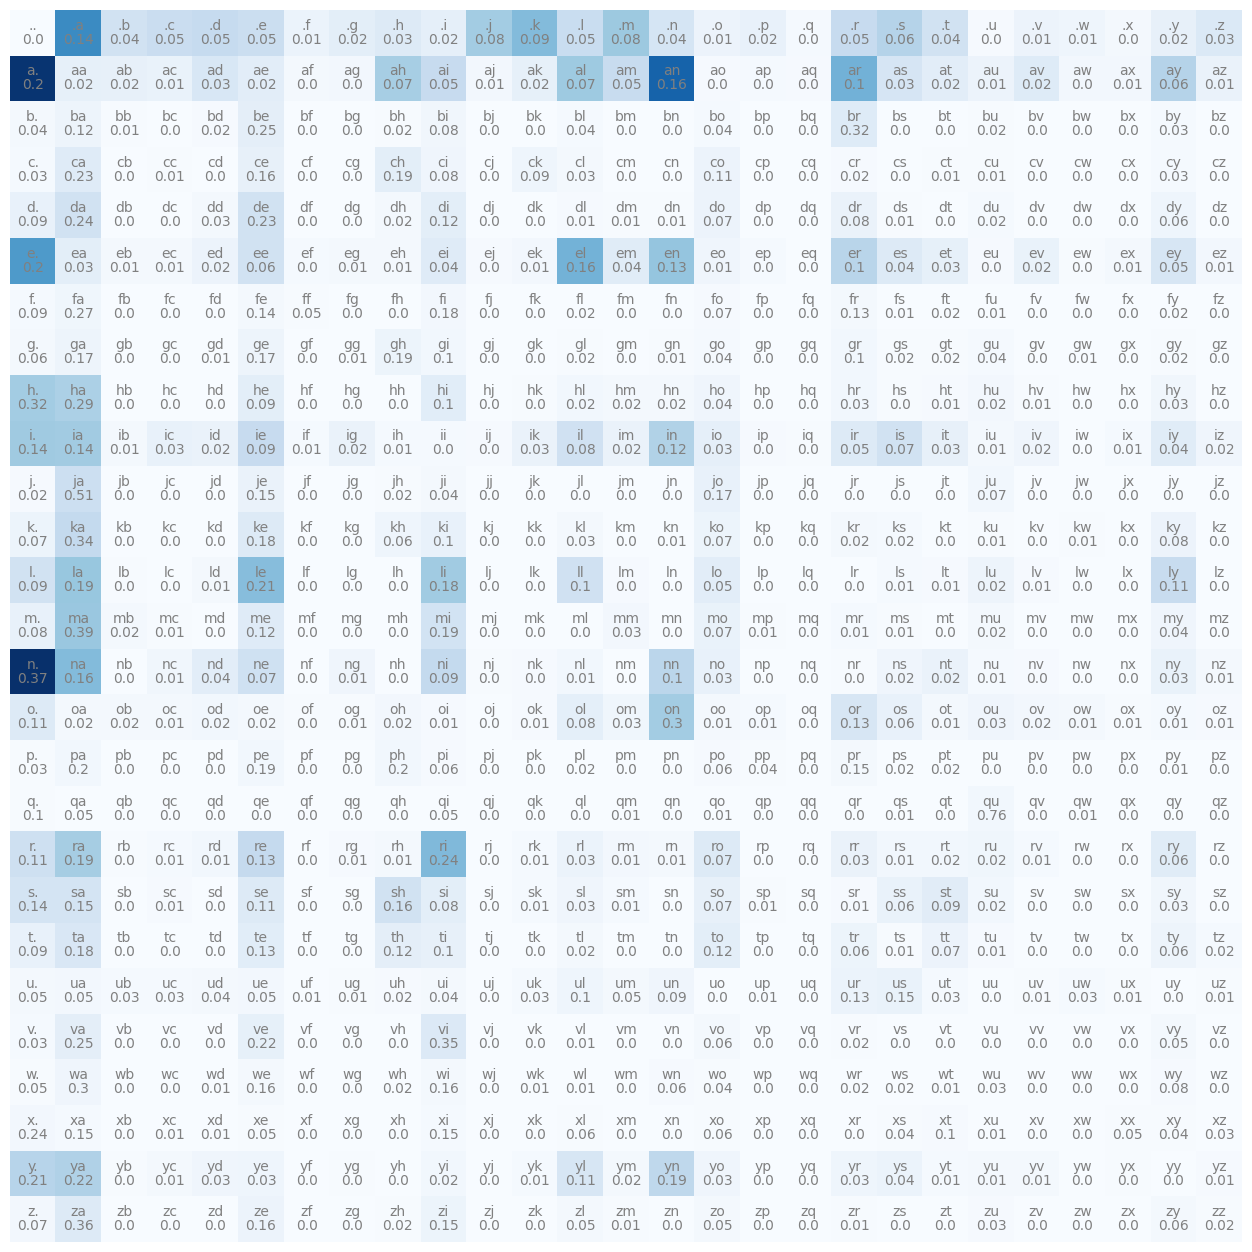

In [183]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,16))
plt.imshow(N,cmap='Blues')
for i in range(27):
    for j in range(27):
        s = itos[i]+itos[j]
        plt.text(j,i,s,ha='center',va='bottom',color='gray')
        plt.text(j,i,round(XX[i][j].item(),2),ha='center',va='top',color='gray')
plt.axis('off')

In [186]:
(M-XX).sum()

tensor(2.6822e-07, grad_fn=<SumBackward0>)